In [1]:
import pandas as pd
train=pd.read_csv('train.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(4209, 378)

In [ ]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
train_data=train.drop(['y','ID'],axis=1)

In [3]:
y_train=train['y']

In [5]:
train_data.shape

(4209, 376)

In [6]:
print('Numerical features size: {}'.format(len(train_data.select_dtypes(include='int').columns)))
print('Categorical features size: {}'.format(len(train_data.select_dtypes(include='object').columns)))

Numerical features size: 368
Categorical features size: 8


In [7]:
print('No of Duplicate IDs:',(len(train['ID'])-len(train['ID'].drop_duplicates())))

No of Duplicate IDs: 0


In [8]:
print('No of null values:',len(train[train.isnull().any(axis=1)]))

No of null values: 0


* There are a total of 368 numerical features and 8 categorical features.
* No duplicate IDs and null values in dataset



**Dependent variable Y**

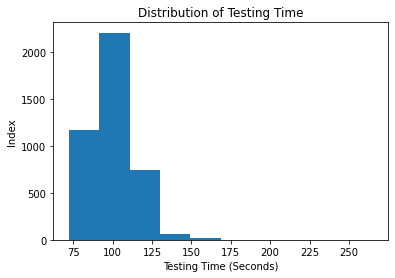

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train['y'])
plt.title("Distribution of Testing Time")
plt.xlabel("Testing Time (Seconds)")
plt.ylabel("Index")
plt.show()

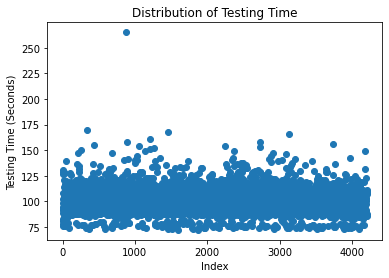

In [ ]:
plt.scatter(range(len(train['y'])), train['y'])
plt.title("Distribution of Testing Time")
plt.xlabel("Index")
plt.ylabel("Testing Time (Seconds)")
plt.show()

It can be observed that testing time lies mostly between 75 to 150. There is also an outlier that lies above 250.

In [ ]:
import numpy as np
quantiles =np.arange(0.99,0.9999,0.001) 
for i in quantiles: 
    print(f"{i*100}th percentile: ",train["y"].quantile(i))

99.0th percentile:  137.43040000000002
99.1th percentile:  139.09024
99.2th percentile:  140.18360000000004
99.3th percentile:  140.81639999999993
99.4th percentile:  142.6480000000001
99.5th percentile:  146.2304000000001
99.6th percentile:  149.0374399999998
99.7th percentile:  151.4276800000003
99.8th percentile:  154.68695999999994
99.9th percentile:  160.38328000000087


We can set 155 as a threshold and remove all points above it considering them as outliers.

**EDA on categorical variables**

In [ ]:
print('Categorical features:',list(train_data.select_dtypes(include='object').columns))

Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


Bar plots

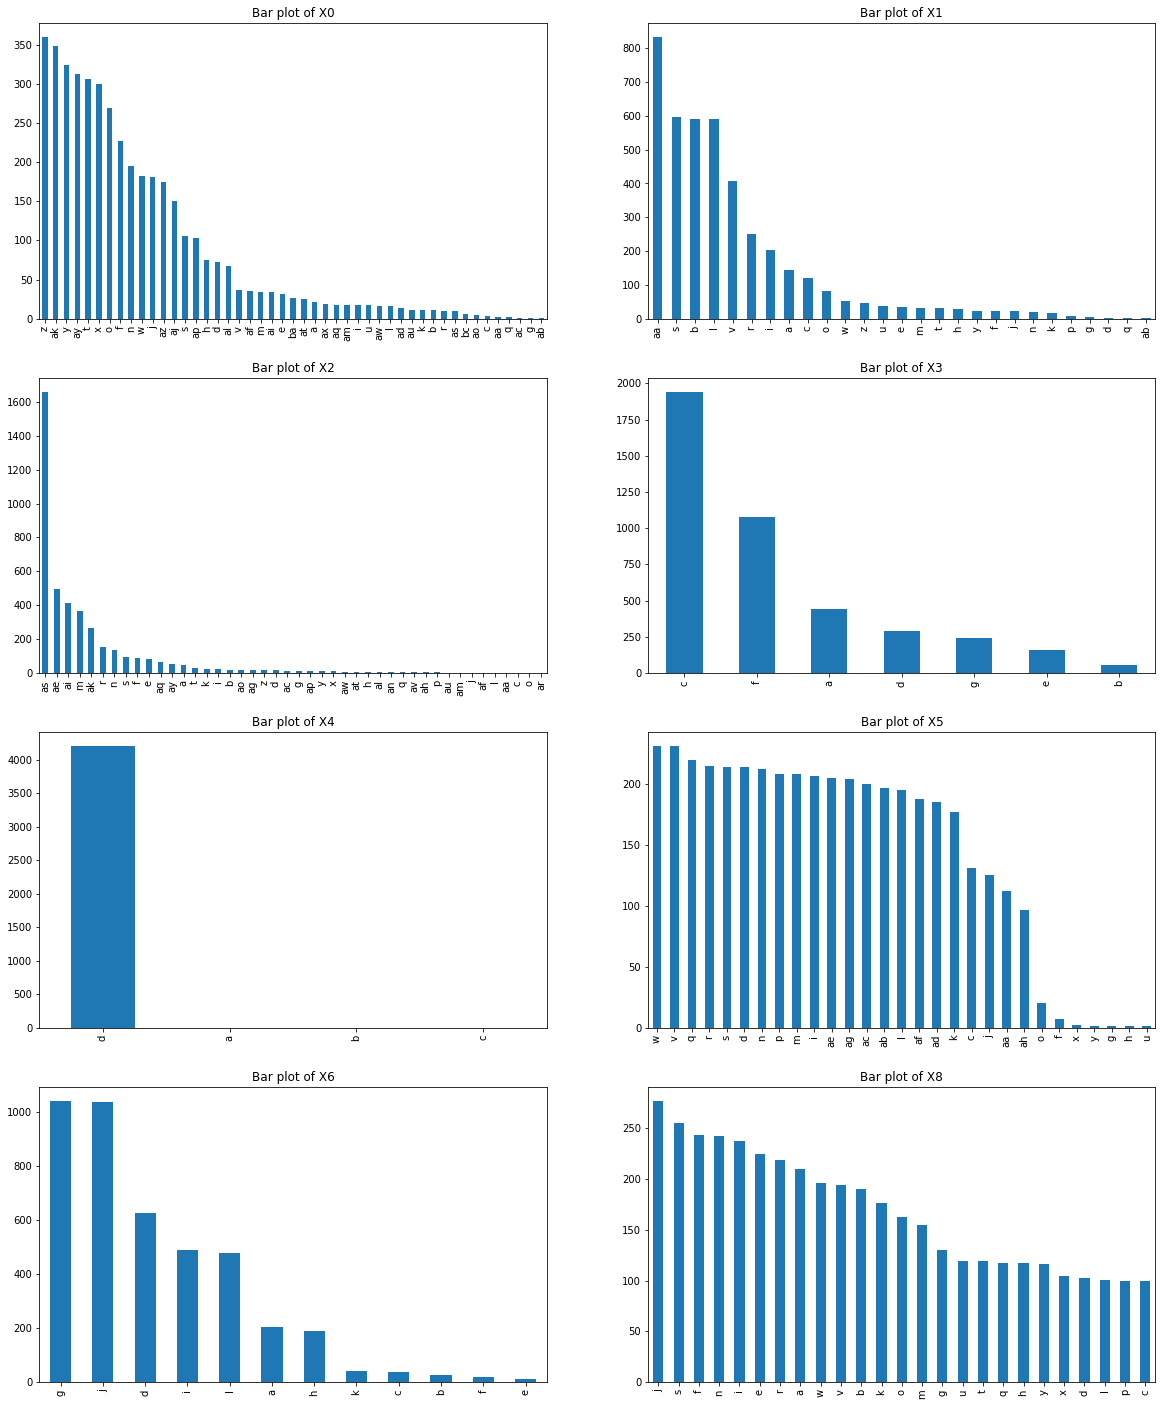

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
train_data.X0.value_counts().plot(kind="bar",title="Bar plot of X0")
plt.subplot(4,2,2)
train_data.X1.value_counts().plot(kind="bar",title="Bar plot of X1")
plt.subplot(4,2,3)
train_data.X2.value_counts().plot(kind="bar",title="Bar plot of X2")
plt.subplot(4,2,4)
train_data.X3.value_counts().plot(kind="bar",title="Bar plot of X3")
plt.subplot(4,2,5)
train_data.X4.value_counts().plot(kind="bar",title="Bar plot of X4")
plt.subplot(4,2,6)
train_data.X5.value_counts().plot(kind="bar",title="Bar plot of X5")
plt.subplot(4,2,7)
train_data.X6.value_counts().plot(kind="bar",title="Bar plot of X6")
plt.subplot(4,2,8)
train_data.X8.value_counts().plot(kind="bar",title="Bar plot of X8")
plt.savefig('b.png')

*   The above plot gives us an intution about the count of different categories 
present in each categorical feature
*   Features X5 and X8 have good distribution over different categories.
*   Feature X4 is focused mostly on one category
*   This plot gives an idea about which category is present high in range



Scatter plot

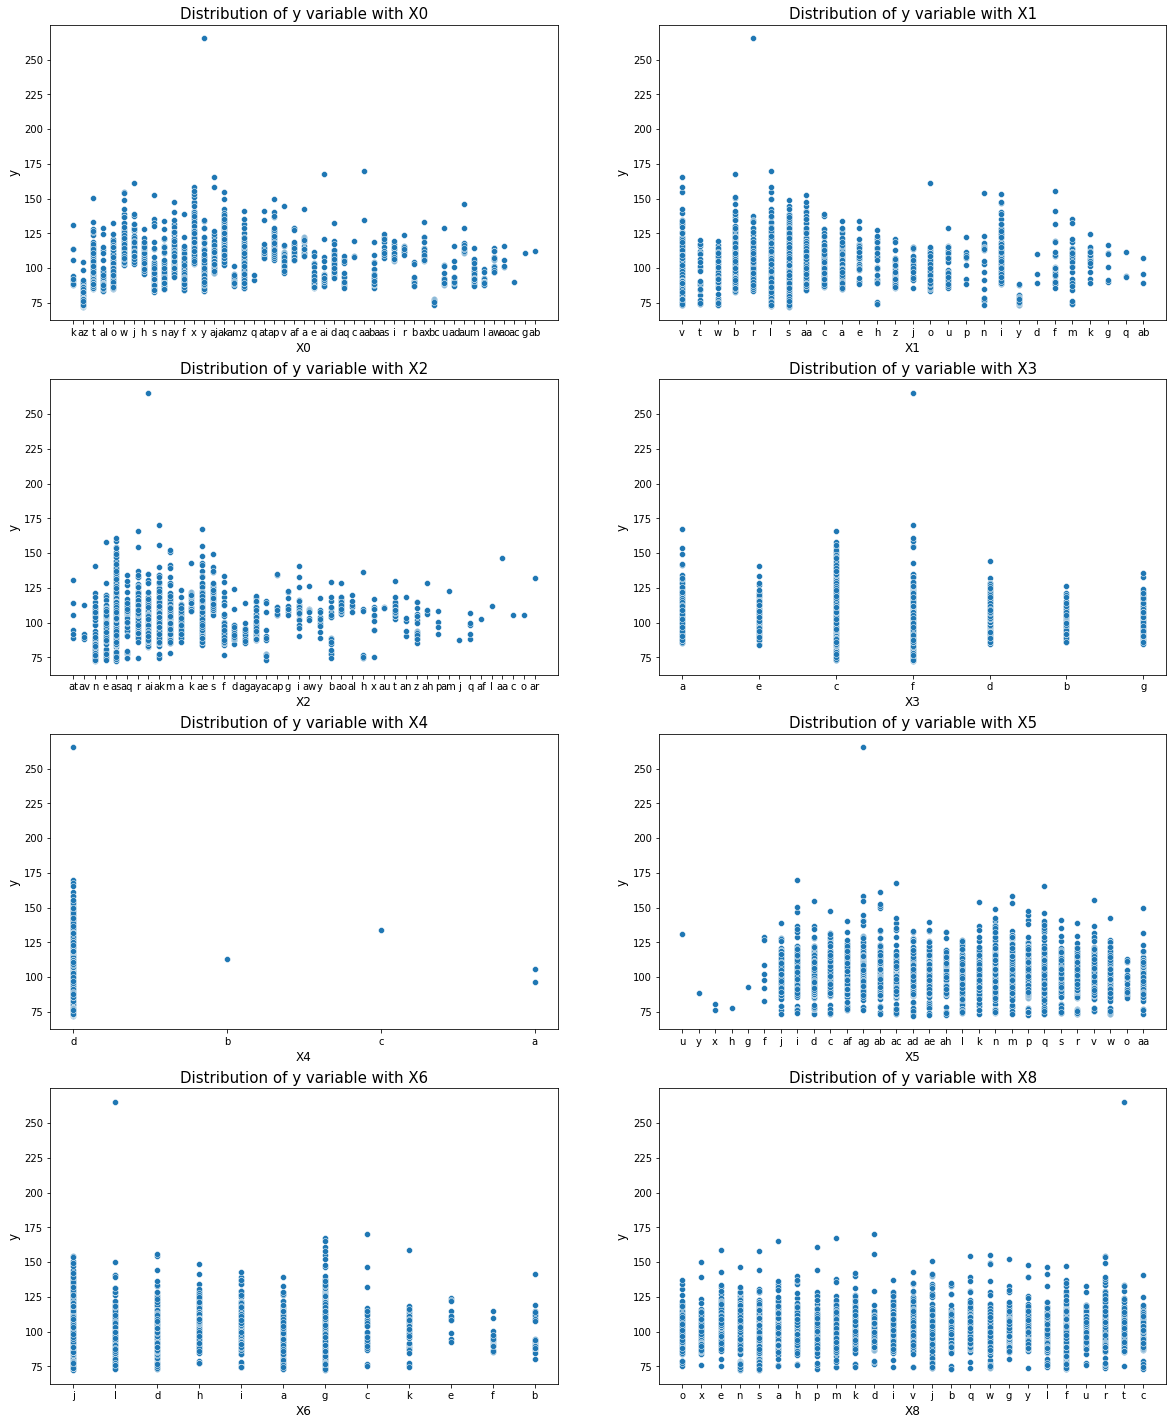

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
sns.scatterplot(x='X0',y='y', data=train)
plt.xlabel("X0", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X0", fontsize=15)

plt.subplot(4,2,2)
sns.scatterplot(x='X1',y='y', data=train)
plt.xlabel("X1", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X1", fontsize=15)

plt.subplot(4,2,3)
sns.scatterplot(x='X2',y='y', data=train)
plt.xlabel("X2", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X2", fontsize=15)

plt.subplot(4,2,4)
sns.scatterplot(x='X3',y='y', data=train)
plt.xlabel("X3", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X3", fontsize=15)

plt.subplot(4,2,5)
sns.scatterplot(x='X4',y='y', data=train)
plt.xlabel("X4", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X4", fontsize=15)

plt.subplot(4,2,6)
sns.scatterplot(x='X5',y='y', data=train)
plt.xlabel("X5", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X5", fontsize=15)

plt.subplot(4,2,7)
sns.scatterplot(x='X6',y='y', data=train)
plt.xlabel("X6", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X6", fontsize=15)

plt.subplot(4,2,8)
sns.scatterplot(x='X8',y='y', data=train)
plt.xlabel("X8", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X8", fontsize=15)

plt.show()

*   The above scatter plot helps us in determining the presence of outliers.
*   The points with value above 250 can be observed as outliers.



Box plot

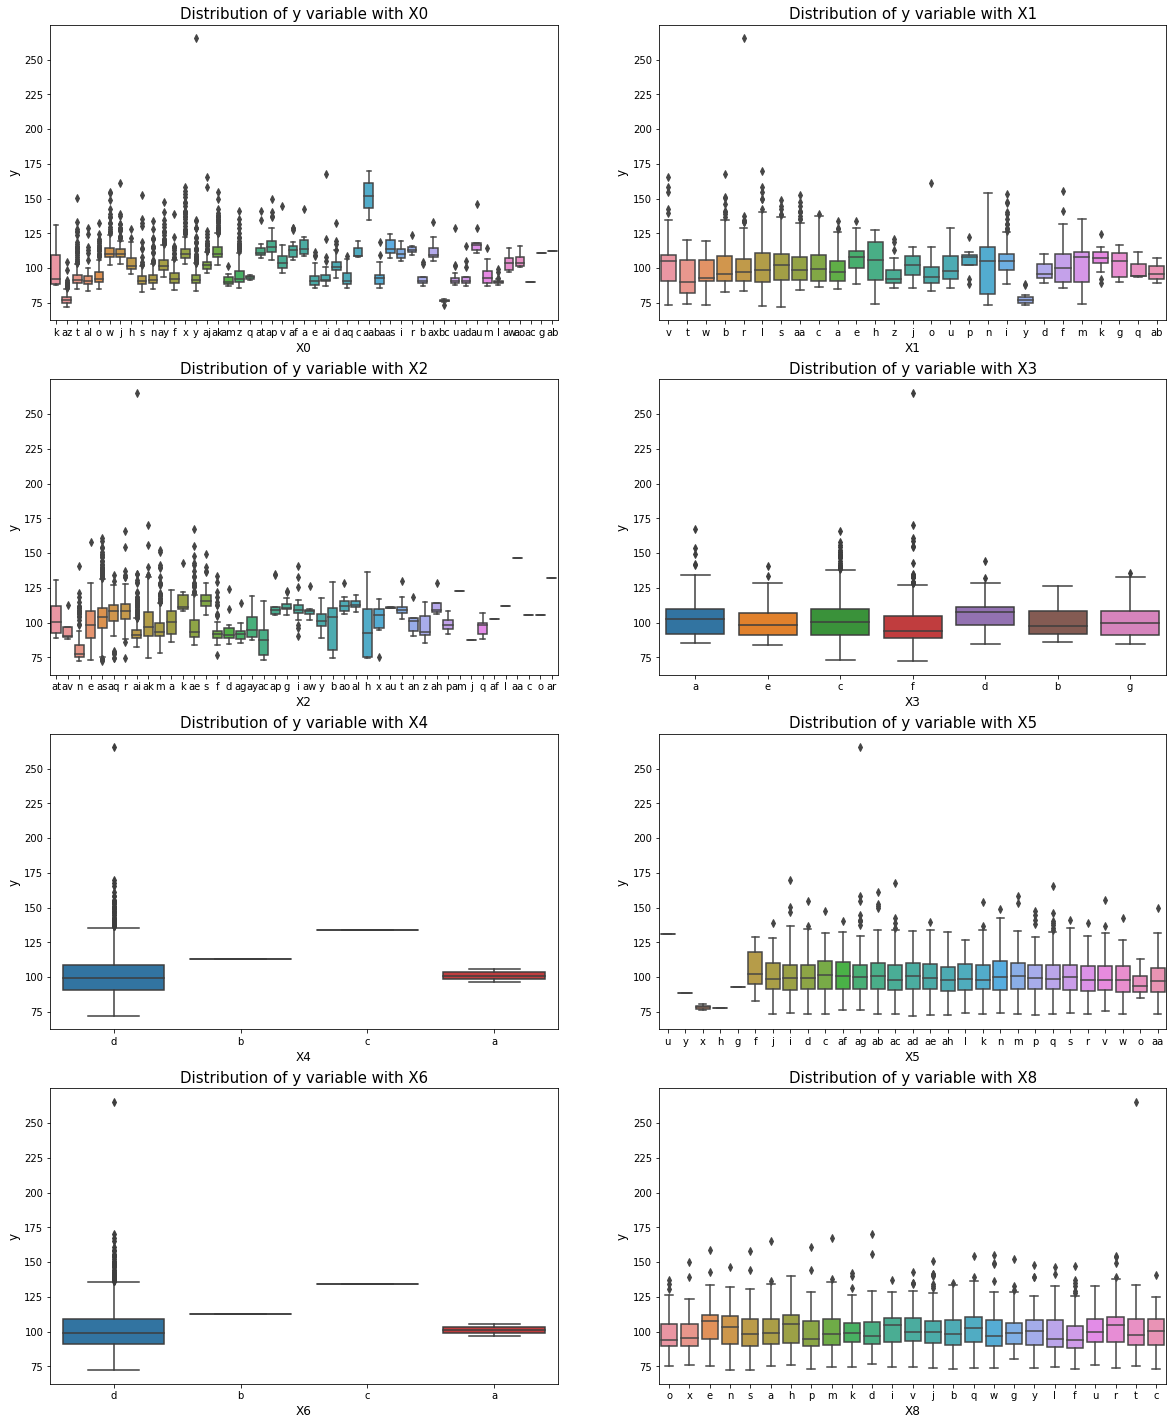

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.boxplot(x="X0", y="y",data=train);
plt.xlabel("X0", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X0", fontsize=15)

plt.subplot(4,2,2)
sns.boxplot(x="X1", y="y",data=train);
plt.xlabel("X1", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X1", fontsize=15)

plt.subplot(4,2,3)
sns.boxplot(x="X2", y="y",data=train);
plt.xlabel("X2", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X2", fontsize=15)

plt.subplot(4,2,4)
sns.boxplot(x="X3", y="y",data=train);
plt.xlabel("X3", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X3", fontsize=15)

plt.subplot(4,2,5)
sns.boxplot(x="X4", y="y",data=train);
plt.xlabel("X4", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X4", fontsize=15)

plt.subplot(4,2,6)
sns.boxplot(x="X5", y="y",data=train);
plt.xlabel("X5", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X5", fontsize=15)

plt.subplot(4,2,7)
sns.boxplot(x="X4", y="y",data=train);
plt.xlabel("X6", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X6", fontsize=15)

plt.subplot(4,2,8)
sns.boxplot(x="X8", y="y",data=train);
plt.xlabel("X8", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X8", fontsize=15)

plt.show()



*   From the above box plot, we can see that mostly the value of y for categorical features lie between 80 to 125.



Violin plot

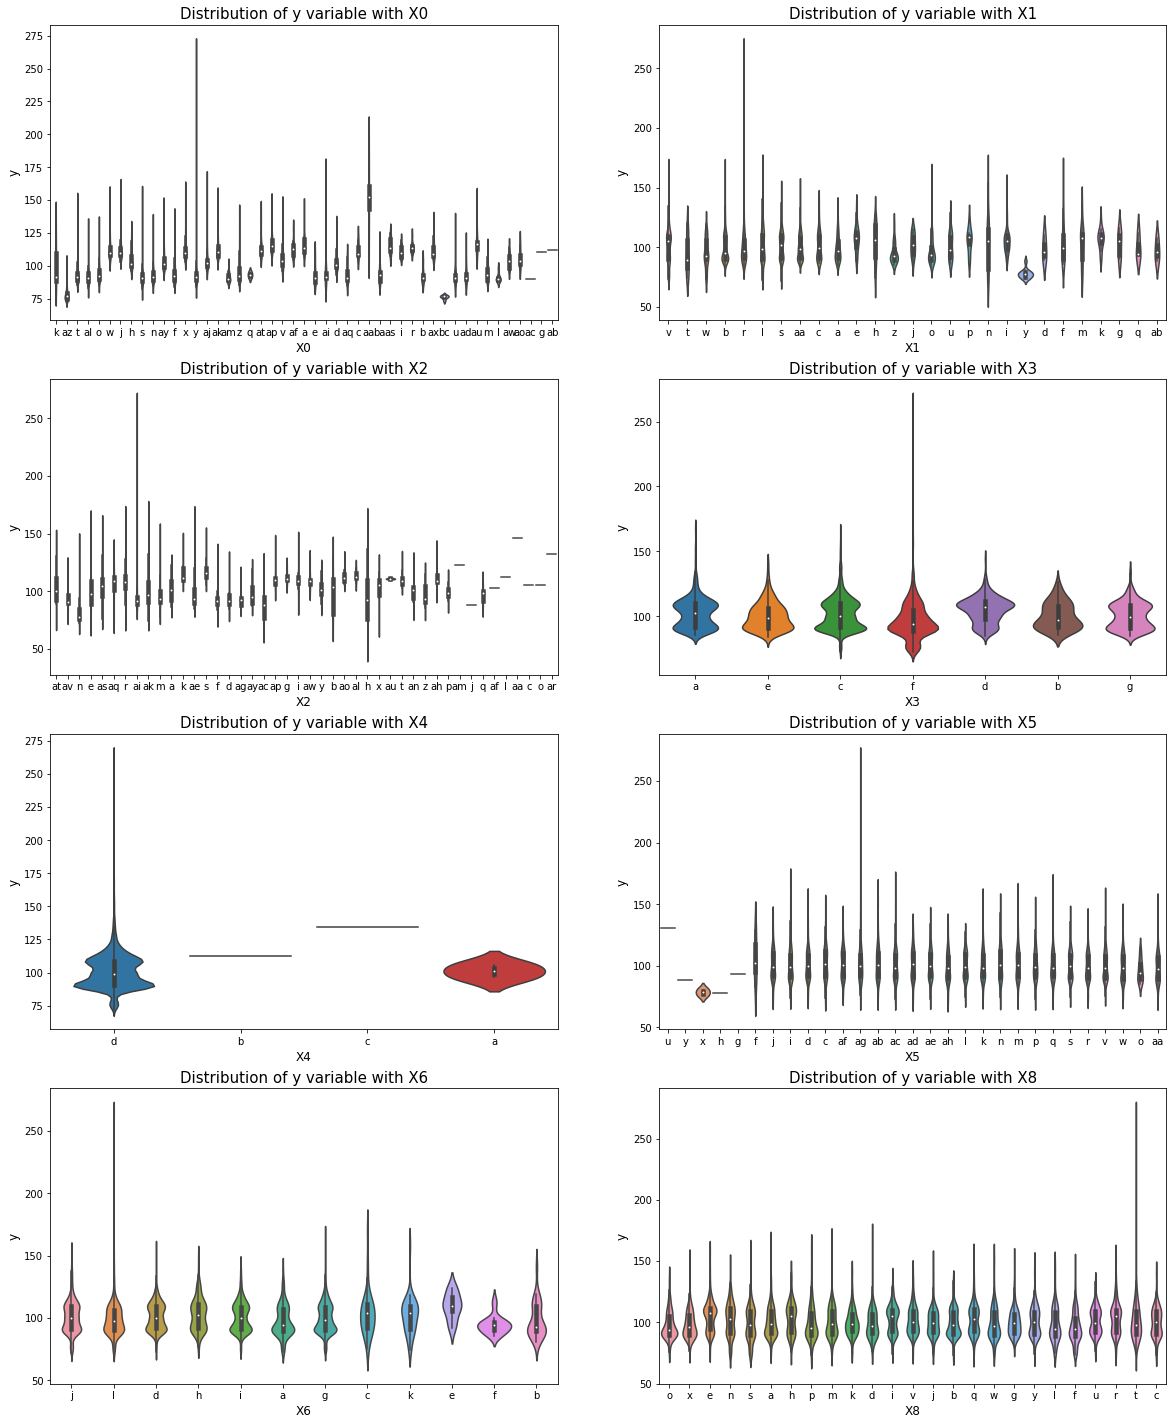

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.violinplot(x="X0", y="y",data=train);
plt.xlabel("X0", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X0", fontsize=15)

plt.subplot(4,2,2)
sns.violinplot(x="X1", y="y",data=train);
plt.xlabel("X1", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X1", fontsize=15)

plt.subplot(4,2,3)
sns.violinplot(x="X2", y="y",data=train);
plt.xlabel("X2", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X2", fontsize=15)

plt.subplot(4,2,4)
sns.violinplot(x="X3", y="y",data=train);
plt.xlabel("X3", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X3", fontsize=15)

plt.subplot(4,2,5)
sns.violinplot(x="X4", y="y",data=train);
plt.xlabel("X4", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X4", fontsize=15)

plt.subplot(4,2,6)
sns.violinplot(x="X5", y="y",data=train);
plt.xlabel("X5", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X5", fontsize=15)

plt.subplot(4,2,7)
sns.violinplot(x="X6", y="y",data=train);
plt.xlabel("X6", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X6", fontsize=15)

plt.subplot(4,2,8)
sns.violinplot(x="X8", y="y",data=train);
plt.xlabel("X8", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with X8", fontsize=15)

plt.show()

*   Categories having outliers can be seen as highly skewed in the above violin plot.
*   Most categories lies within the range 75 to 125 of y.



**EDA on binary features**

In [9]:
binary_features=[]
for f in list(train.columns):
  if train[f].dtype=='int' and f!='ID':
    binary_features.append(f)
print('Number of binary features are:{}'.format(len(binary_features)))

Number of binary features are:368


In [10]:
binary_train=train[binary_features]
binary_train.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


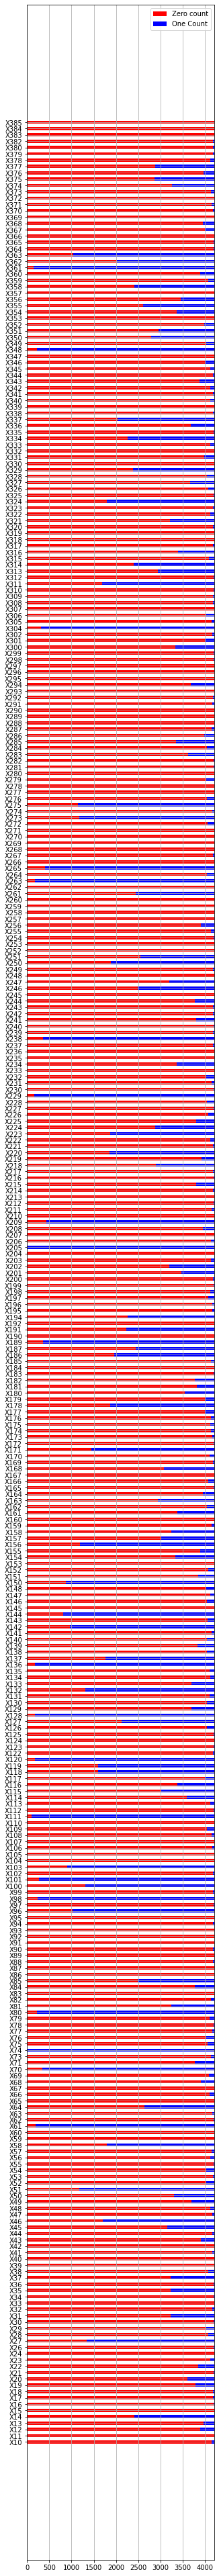

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
one_count=[]
zero_count=[]
width=0.5
num=len(binary_train.columns)
index=np.arange(num)
for col in binary_train.columns:
      one_count.append((binary_train[col]==1).sum())
      zero_count.append((binary_train[col]==0).sum())
plt.figure(figsize=(5,70))
y1=plt.barh(index,zero_count,width,color="red")
y2=plt.barh(index,one_count,width,left=zero_count,color="blue")
plt.yticks(index,binary_train.columns)
plt.legend((y1[0],y2[0]), ('Zero count', 'One Count'))
plt.grid()
plt.savefig('a.jpg')

*   From the above plot it can be observed that there are some columns with 0 
variance

In [11]:
var = []
for f in binary_features:
    v = binary_train[f].var()
    var.append((f,v))

var_dict = dict(var)

In [12]:
keys=[k for k, v in var_dict.items() if v==0]
print('Columns with zero variance are {}'.format(keys))
print(len(keys))

Columns with zero variance are ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
12


In [13]:
low_var=[k for k, v in var_dict.items() if v<0.01 and k not in keys]
print(len(low_var))

135


* We have total 135 features with variance less than 0.01 and 12 features that have variance equal to 0.
* These features can be removed to reduce dimension of the dataset

In [14]:
from scipy.stats.stats import pearsonr
pear_cor_dic={}
for col in binary_train.columns:
  corr=pearsonr(binary_train[col],y_train)
  if corr[0]>=0.25:
     pear_cor_dic["Top Pearson correlation coeffienct value with respect to output variable",col]=corr[0]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
pear_cor_dic

{('Top Pearson correlation coeffienct value with respect to output variable',
  'X118'): 0.27272787966280054,
 ('Top Pearson correlation coeffienct value with respect to output variable',
  'X119'): 0.27272787966280054,
 ('Top Pearson correlation coeffienct value with respect to output variable',
  'X136'): 0.36817713854653333,
 ('Top Pearson correlation coeffienct value with respect to output variable',
  'X261'): 0.5887851610438142,
 ('Top Pearson correlation coeffienct value with respect to output variable',
  'X263'): 0.37962883965528266,
 ('Top Pearson correlation coeffienct value with respect to output variable',
  'X275'): 0.2750415621218218,
 ('Top Pearson correlation coeffienct value with respect to output variable',
  'X314'): 0.606005213670364}

In [23]:
threshold=1
feat_corr = []
corr_mat = train_data.corr()

for i in range(len(corr_mat.columns)):
    for j in range(i):
        if (corr_mat.iloc[i, j] == threshold) and (corr_mat.columns[j] not in feat_corr):
            colname = corr_mat.columns[i] # getting the name of column
            feat_corr.append(colname)

In [ ]:
print("No. of Duplicate Featureas:",len(feat_corr))

No. of Duplicate Featureas: 45


* We have a total of 45 features that are highly correlated with each other.
* These features can be seen as duplicate binary features and can be removed from dataset.

Loading test data

In [15]:
test=pd.read_csv('test.csv')

**Data Preprocessing**

Adding two way interaction features

In [16]:
train['X118_add_X263']=train.apply(lambda row: row.X118 + row.X263, axis=1)
train['X136_add_X261']=train.apply(lambda row: row.X136 + row.X261, axis=1)
train['X275_add_X314']=train.apply(lambda row: row.X275 + row.X314, axis=1)

In [17]:
test['X118_add_X263']=test.apply(lambda row: row.X118 + row.X263, axis=1)
test['X136_add_X261']=test.apply(lambda row: row.X136 + row.X261, axis=1)
test['X275_add_X314']=test.apply(lambda row: row.X275 + row.X314, axis=1)

In [ ]:
print("The correlation between X118_add_X263 and target variable is:",pearsonr(train["X118_add_X263"],train['y'])[0])
print("The correlation between X136_add_X261 and target variable is:",pearsonr(train["X136_add_X261"],train['y'])[0])
print("The correlation between X275_add_X314 and target variable is:",pearsonr(train["X275_add_X314"],train['y'])[0])

The correlation between X118_add_X263 and target variable is: 0.36438866117932184
The correlation between X136_add_X261 and target variable is: 0.6447553279511336
The correlation between X275_add_X314 and target variable is: 0.612125752848817


Adding three way interaction features

In [18]:
train['X118_add_X263_add_X136']=train.apply(lambda row: row.X118 + row.X263 + row.X136, axis=1)
train['X314_add_X261_add_X275']=train.apply(lambda row: row.X314 + row.X261 + row.X275, axis=1)
train['X276_add_X118_add_X261']=train.apply(lambda row: row.X276 + row.X118 + row.X261, axis=1)

In [19]:
test['X118_add_X263_add_X136']=test.apply(lambda row: row.X118 + row.X263 + row.X136, axis=1)
test['X314_add_X261_add_X275']=test.apply(lambda row: row.X314 + row.X261 + row.X275, axis=1)
test['X276_add_X118_add_X261']=test.apply(lambda row: row.X276 + row.X118 + row.X261, axis=1)

In [ ]:
print("The correlation between X118_add_X263_add_X136 and target variable is:",pearsonr(train["X118_add_X263_add_X136"],train['y'])[0])
print("The correlation between X314_add_X261_add_X275 and target variable is:",pearsonr(train["X314_add_X261_add_X275"],train['y'])[0])
print("The correlation between X276_add_X118_add_X261 and target variable is:",pearsonr(train["X276_add_X118_add_X261"],train['y'])[0])

The correlation between X118_add_X263_add_X136 and target variable is: 0.3990347998768604
The correlation between X314_add_X261_add_X275 and target variable is: 0.6447962488203304
The correlation between X276_add_X118_add_X261 and target variable is: 0.5350806968287593


Reducing dimensions

In [20]:
train.drop(keys, axis=1,inplace=True)
train.shape

(4209, 372)

In [21]:
train.drop(low_var, axis=1, inplace=True)
train.shape

(4209, 237)

In [24]:
for i in feat_corr:
  if i in train.columns:
    train.drop(i, axis=1, inplace=True)
train.shape

(4209, 218)

In [ ]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X118_add_X263,X136_add_X261,X275_add_X314,X118_add_X263_add_X136,X314_add_X261_add_X275,X276_add_X118_add_X261
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,2,1,1,3,1,1
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,2,1,1,3,1,1
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,0,0,1
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,1
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,1


Removing outliers

In [25]:
train=train.drop(train[(train['y']>150)].index)

In [26]:
train.shape


(4194, 218)

After removing some rows and columns and adding some features we are left with 218 columns and 4194 rows, which is a good reduction.

In [27]:
test.drop(keys, axis=1,inplace=True)
test.shape

(4209, 371)

In [28]:
test.drop(low_var, axis=1, inplace=True)
test.shape

(4209, 236)

In [29]:
for i in feat_corr:
  if i in test.columns:
    test.drop(i, axis=1, inplace=True)
test.shape

(4209, 217)

In [30]:
drop=[]
for i in feat_corr:
  drop.append(i)
for i in low_var:
  if i not in drop:
    drop.append(i)
for i in keys:
  if i not in drop:
    drop.append(i)
#save this drop  as a txt file to use in final pipeline

In [ ]:
len(drop)

166

Now performing mean encoding on categorical features

In [31]:
categorical=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
y_mean=train.y.mean()
for i in categorical:
  train_mean=train.groupby(i)['y'].mean().to_dict()
  train[i]=train[i].map(train_mean)
  for j in range(4209):
    if test[i][j] in train_mean:
      test[i]=test[i].replace([test[i][j]],train_mean.get(test[i][j]))
    else:
      test[i]=test[i].replace([test[i][j]],y_mean)

In [32]:
y_train=train['y']
x_train_mean=train.drop(['y'], axis=1)

In [33]:
x_train_mean.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X118_add_X263,X136_add_X261,X275_add_X314,X118_add_X263_add_X136,X314_add_X261_add_X275,X276_add_X118_add_X261
0,0,99.491818,100.983086,104.218333,102.242763,100.428654,130.81,101.015569,97.746933,0,...,0,0,1,0,2,1,1,3,1,1
1,6,99.491818,93.723226,95.510000,100.033190,100.428654,88.53,98.487815,97.746933,0,...,1,0,0,0,2,1,1,3,1,1
2,7,78.025543,95.764808,83.369927,101.766129,100.428654,78.44,101.015569,98.078654,0,...,0,0,0,0,0,0,0,0,0,1
3,9,78.025543,93.723226,83.369927,96.111916,100.428654,78.44,98.487815,104.737232,0,...,0,0,0,0,0,0,0,0,0,1
4,13,78.025543,100.983086,83.369927,96.111916,100.428654,78.02,101.174141,102.194215,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X118_add_X263,X136_add_X261,X275_add_X314,X118_add_X263_add_X136,X314_add_X261_add_X275,X276_add_X118_add_X261
0,1,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,0,...,0,0,0,1,0,0,0,0,0,1
1,2,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,0,...,0,0,1,0,2,1,1,3,1,1
2,3,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,0,...,0,0,0,1,0,0,0,0,0,1
3,4,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,100.439938,0,...,0,0,0,1,0,0,0,0,0,1
4,5,100.439938,100.439938,100.439938,100.439938,100.439938,88.530000,100.439938,100.439938,0,...,1,0,0,0,2,2,2,3,3,2


Standardising

In [35]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
train_mean_std=std.fit_transform(x_train_mean.values)
test_mean_std=std.transform(test.values)

Performing PCA

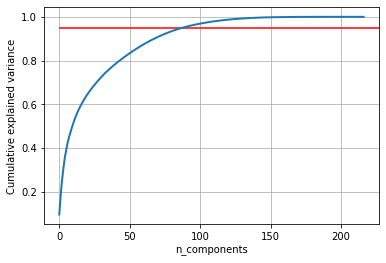

Thus 90 principle component explain about 95 percentage of the variance in feature on train dataset


In [37]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca= PCA(n_components=217)
pca_train_mean=pca.fit_transform(train_mean_std)
perc_var=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var=np.cumsum(perc_var)
for i, j in enumerate(cum_var):
  if np.round(j,2)==0.95:
    feature_select=i

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
plt.hlines(y=0.95, xmin=0, xmax=350, color='r')
plt.show()
print("Thus {0} principle component explain about 95 percentage of the variance in feature on train dataset".format(feature_select))

In [38]:
pca=PCA(n_components=90)
pca_train_mean=pca.fit_transform(train_mean_std)
pca_test_mean=pca.transform(test_mean_std)

In [39]:
pca_train_mean.shape

(4194, 90)

In [40]:
pca_test_mean.shape

(4209, 90)

In [41]:
print('After PCA we are left with')
print('Shape of training data after PCA:',pca_train_mean.shape)
print('Shape of test data after PCA:', pca_test_mean.shape)

After PCA we are left with
Shape of training data after PCA: (4194, 90)
Shape of test data after PCA: (4209, 90)


**Linear regression**

In [ ]:
import sklearn.model_selection
x_train, x_test, y_train_, y_test=sklearn.model_selection.train_test_split(pca_train_mean, y_train, test_size=0.33, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train_.shape)
print(y_test.shape)

(2809, 90)
(1385, 90)
(2809,)
(1385,)


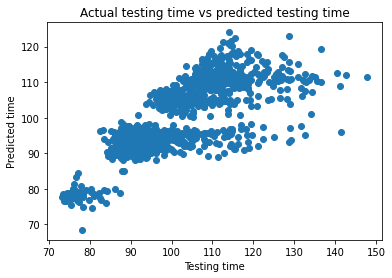

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train, y_train_)
y_pred=lr.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Testing time')
plt.ylabel('Predicted time')
plt.title('Actual testing time vs predicted testing time')
plt.show()

In [ ]:
print('R^2 score is:',lr.score(x_test, y_test))

R^2 score is: 0.6091350094623229


In [ ]:
lr.fit(pca_train_mean, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
pred_train=lr.predict(pca_train_mean)
train_score=r2_score(y_train, pred_train)
print(f'Train R2={train_score}')

Train R2=0.6306236267390486


In [ ]:
pred_test=lm.predict(pca_test_mean)
lr=pd.read_csv('sample_submission.csv')
lr['y']=pred_test
lr.to_csv('lr.csv', index=False)

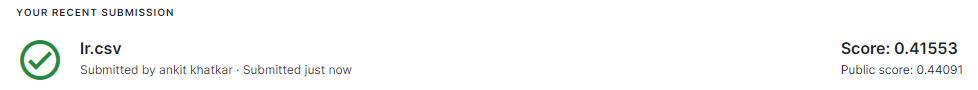

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
y_train_


2933    104.67
4191     88.93
3509     96.65
1823     92.99
3052     88.73
         ...  
3059     87.22
1735    106.52
4094     85.09
2265     99.53
2928     89.22
Name: y, Length: 2809, dtype: float64

In [ ]:
DT=DecisionTreeRegressor()
parameters={'max_depth':[1, 5, 10, 50, 100, 500, 1000]}

regressor=RandomizedSearchCV(DT,param_distributions=parameters, verbose=10, n_jobs=-1)
dtr=regressor.fit(x_train, y_train_)
best_max_depth = dtr.best_estimator_.get_params()['max_depth']

#Print The best parameters
print('Best max_depth:', best_max_depth)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best max_depth: 5


In [ ]:
from sklearn.metrics import r2_score
dtr1 = DecisionTreeRegressor(max_depth=best_max_depth)
dtr1.fit(x_train, y_train_)
pred_train = dtr1.predict(x_train)
train_score = r2_score(y_train_, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = dtr1.predict(x_test)
cv_score = r2_score(y_test, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=5, Train R2 = 0.56836537920931
For max_depth=5, CV R2 = 0.4611306799649848


In [ ]:
dtr1.fit(pca_train_mean, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
pred_train=dtr1.predict(pca_train_mean)
train_score=r2_score(y_train, pred_train)
print(f'For max depth={best_max_depth}, Train R2={train_score}')

For max depth=5, Train R2=0.5685233407823975


In [ ]:
pred_test=dtr1.predict(pca_test_mean)
DTR=pd.read_csv('sample_submission.csv')
DTR['y']=pred_test
DTR.to_csv('DTR.csv', index=False)
DTR.shape

(4209, 2)

In [ ]:
#files.download('DTR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

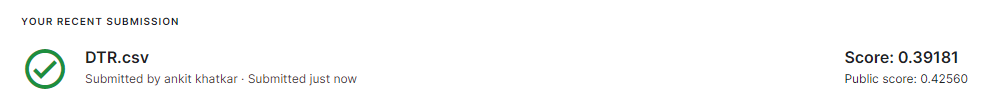

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = [100, 150, 200, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 3, 5, 10]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
regressor = RandomizedSearchCV(rf, param_distributions=parameters, verbose=10, n_jobs=-1)

best_regressor = regressor.fit(x_train, y_train_)

best_max_depth = best_regressor.best_estimator_.get_params()['max_depth']
best_n_estimators = best_regressor.best_estimator_.get_params()['n_estimators']
best_max_features = best_regressor.best_estimator_.get_params()['max_features']
best_min_samples_split = best_regressor.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf = best_regressor.best_estimator_.get_params()['min_samples_leaf']

print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best max_features:', best_max_features)
print('Best min_samples_split:', best_min_samples_split)
print('Best min_samples_leaf:', best_min_samples_leaf)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best max_depth: 10
Best n_estimators: 500
Best max_features: auto
Best min_samples_split: 15
Best min_samples_leaf: 1


In [ ]:
rf0=RandomForestRegressor(n_estimators=best_n_estimators, max_features=best_max_features, max_depth=best_max_depth, min_samples_split=best_min_samples_split,
               min_samples_leaf= best_min_samples_leaf)
rf0.fit(x_train, y_train_)
pred_train=rf0.predict(x_train)
train_score=r2_score(y_train_, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = rf0.predict(x_test)
cv_score = r2_score(y_test, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=10, Train R2 = 0.7779340285004344
For max_depth=10, CV R2 = 0.5545019516583898


In [ ]:
rf1=RandomForestRegressor(n_estimators=best_n_estimators, max_features=best_max_features, 
                          max_depth=best_max_depth, min_samples_split=best_min_samples_split,
               min_samples_leaf= best_min_samples_leaf)
rf1.fit(pca_train_mean, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=500)

In [ ]:
pred_train=rf1.predict(pca_train_mean)
train_score=r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=10, Train R2 = 0.757003656043284


In [ ]:
pred_test=rf1.predict(pca_test_mean)
submission_RF=pd.read_csv('sample_submission.csv')
submission_RF['y']=pred_test
submission_RF.to_csv(f'RF.csv', index=False)

In [ ]:
#files.download('RF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

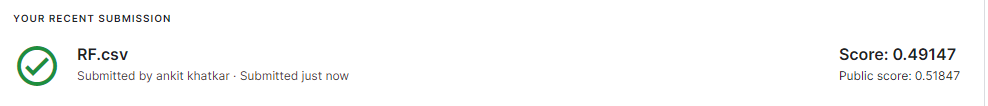

**Extra Tree regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
neigh=ExtraTreesRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[150,200,300,500],
             'max_depth':[2,3,4,5,10],
             'min_samples_split':[2, 5, 10],
             'max_features': [.95],
             'min_samples_leaf': [3,4,5,6,7,10],
             'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]}
Extra_reg=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
best_extra_reg=Extra_reg.fit(x_train,y_train_)

best_max_depth = best_extra_reg.best_estimator_.get_params()['max_depth']
best_n_estimators = best_extra_reg.best_estimator_.get_params()['n_estimators']
best_max_features = best_extra_reg.best_estimator_.get_params()['max_features']
best_min_samples_split = best_extra_reg.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf = best_extra_reg.best_estimator_.get_params()['min_samples_leaf']
best_min_impurity_decrease = best_extra_reg.best_estimator_.get_params()['min_impurity_decrease']

print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best max_features:', best_max_features)
print('Best min_samples_split:', best_min_samples_split)
print('Best min_samples_leaf:', best_min_samples_leaf)
print('Best min_impurity_decrease:', best_min_impurity_decrease)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best max_depth: 10
Best n_estimators: 200
Best max_features: 0.95
Best min_samples_split: 2
Best min_samples_leaf: 7
Best min_impurity_decrease: 0


In [ ]:
er0=ExtraTreesRegressor(n_estimators=best_n_estimators, max_features=best_max_features, max_depth=best_max_depth, min_samples_split=best_min_samples_split,
               min_samples_leaf= best_min_samples_leaf, min_impurity_decrease=best_min_impurity_decrease)
er0.fit(x_train, y_train_)
pred_train=er0.predict(x_train)
train_score=r2_score(y_train_, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = er0.predict(x_test)
cv_score = r2_score(y_test, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=10, Train R2 = 0.708461562724098
For max_depth=10, CV R2 = 0.5653297524413083


In [ ]:
er=ExtraTreesRegressor(n_estimators=best_n_estimators, max_features=best_max_features, 
                       max_depth=best_max_depth, min_samples_split=best_min_samples_split,
               min_samples_leaf= best_min_samples_leaf, min_impurity_decrease=best_min_impurity_decrease)
er.fit(pca_train_mean, y_train)

ExtraTreesRegressor(max_depth=10, max_features=0.95, min_impurity_decrease=0,
                    min_samples_leaf=7, n_estimators=200)

In [ ]:
pred_train=er.predict(pca_train_mean)
train_score=r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=10, Train R2 = 0.689296862216386


In [ ]:
pred_test=er.predict(pca_test_mean)
submission_er=pd.read_csv('sample_submission.csv')
submission_er['y']=pred_test
submission_er.to_csv(f'ETR.csv', index=False)

In [ ]:
#files.download('ETR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

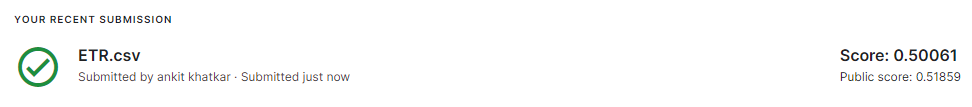

**XGBoost regressor**

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb=XGBRegressor(random_state=42, n_jobs=-1)
parameters={'learning_rate':[0.001,0.01,0.05,0.1,1], 'n_estimators':[100,150,200,500], 'max_depth':[2,3,5,10], 'colsample_bytree':[0.1,0.5,0.7,1], 
              'subsample':[0.2,0.3,0.5,1], 'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1], 'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]} 
reg=RandomizedSearchCV(xgb, parameters, cv=5, scoring='r2', return_train_score=True, n_jobs=-1, verbose=10)
reg.fit(x_train, y_train_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[08:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
                                                  0.5, 1],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 1],
                                        'max_depth': [2, 3, 5, 10],
                                        'n_estimators': [100, 150, 200, 500],
                                        'reg_alpha': [1e-05, 0.001, 0.1, 1,
                                                      10.0],
                                        'subsample': [0.2, 0.3, 0.5, 1]},
                   return_train_score=True, scoring='r2', verbose=10)

In [ ]:
best_max_depth = reg.best_estimator_.get_params()['max_depth']
best_n_estimators = reg.best_estimator_.get_params()['n_estimators']
best_colsample_bytree = reg.best_estimator_.get_params()['colsample_bytree']
best_subsample = reg.best_estimator_.get_params()['subsample']
best_gamma = reg.best_estimator_.get_params()['gamma']
best_reg_alpha = reg.best_estimator_.get_params()['reg_alpha']
best_learning_rate = reg.best_estimator_.get_params()['learning_rate']
print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best colsample_bytree:', best_colsample_bytree)
print('Best subsample:', best_subsample)
print('Best reg_alpha:', best_reg_alpha)
print('Best gamma:', best_gamma)
print('Best learning_rate:', best_learning_rate)

Best max_depth: 3
Best n_estimators: 200
Best colsample_bytree: 0.1
Best subsample: 1
Best reg_alpha: 1e-05
Best gamma: 0.001
Best learning_rate: 0.1


In [ ]:
xgb1 = XGBRegressor(n_estimators = best_n_estimators, learning_rate = best_learning_rate, max_depth = best_max_depth, subsample = best_subsample,
               gamma = best_gamma, reg_alpha = best_reg_alpha, colsample_bytree = best_colsample_bytree, random_state=42,n_jobs=-1)
xgb1.fit(x_train, y_train_)

[08:56:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.1, gamma=0.001, n_estimators=200, n_jobs=-1,
             random_state=42, reg_alpha=1e-05)

In [ ]:
pred_train = xgb1.predict(x_train)
train_score = r2_score(y_train_, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = xgb1.predict(x_test)
cv_score = r2_score(y_test, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=3, Train R2 = 0.7698906378740282
For max_depth=3, CV R2 = 0.5760599779656503


In [ ]:
xgb1 = XGBRegressor(n_estimators = best_n_estimators, learning_rate = best_learning_rate, 
                    max_depth = best_max_depth, subsample = best_subsample,
               gamma = best_gamma, reg_alpha = best_reg_alpha, 
               colsample_bytree = best_colsample_bytree, random_state=42,n_jobs=-1)
xgb1.fit(pca_train_mean, y_train)

[08:56:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.1, gamma=0.001, n_estimators=200, n_jobs=-1,
             random_state=42, reg_alpha=1e-05)

In [ ]:
pred_train = xgb1.predict(pca_train_mean)
train_score = r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=3, Train R2 = 0.7335721331978673


In [ ]:
pred_test = xgb1.predict(pca_test_mean)
submission_xgb = pd.read_csv('sample_submission.csv')
submission_xgb['y'] = pred_test
submission_xgb.to_csv('XGB.csv', index=False)

In [ ]:
#files.download('XGB.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

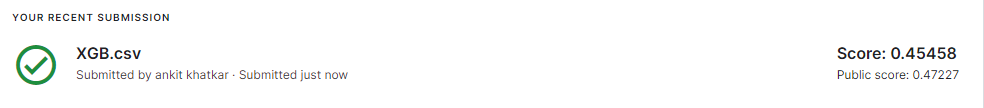

**Stacking Models**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index,:], y.values[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (er, xgb1),
                                                 meta_model = rf1)

In [ ]:
stacked_averaged_models.fit(pca_train_mean, y_train)

[08:59:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:59:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingAveragedModels(base_models=(ExtraTreesRegressor(max_depth=10,
                                                        max_features=0.95,
                                                        min_impurity_decrease=0,
                                                        min_samples_leaf=7,
                                                        n_estimators=200),
                                    XGBRegressor(colsample_bytree=0.1,
                                                 gamma=0.001, n_estimators=200,
                                                 n_jobs=-1, random_state=42,
                                                 reg_alpha=1e-05)),
                       meta_model=RandomForestRegressor(max_depth=10,
                                                        min_samples_split=15,
                                                        n_estimators=500))

In [ ]:
pred_train = stacked_averaged_models.predict(pca_train_mean)
train_score = r2_score(y_train, pred_train)
print(f"Train R2 = {train_score}")

Train R2 = 0.6734579022633118


In [ ]:
pred_test = stacked_averaged_models.predict(pca_test_mean)
submission_stacked = pd.read_csv('sample_submission.csv')
submission_stacked['y'] = pred_test
submission_stacked.to_csv('stacked.csv', index=False)

In [ ]:
#files.download('stacked.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#saving stacked model as a pkl file for future use
import pickle
filename=open("stacked_averaged_models.pkl","wb")
saved_model = pickle.dump(stacked_averaged_models,filename) 

In [ ]:
#files.download('stacked_averaged_models.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

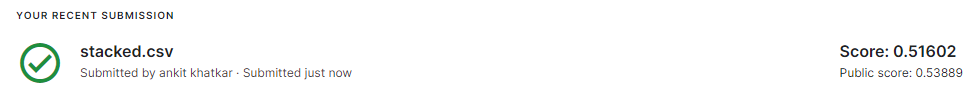

In [ ]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["S.no.","Model","R2score","Private_score","Public_score"]
x.add_row(["1","Linear regression","0.568","0.440","0.415"])
x.add_row(["2","Decision Tree","0.568","0.425","0.391"])
x.add_row(["3","Random Forest","0.596","0.518","0.491"])
x.add_row(["4","Extra Tree Regressor","0.704","0.518","0.500"])
x.add_row(["5","XGBoost","0.620","0.472","0.454"])
x.add_row(["6", "Stacked(XGBoost + Random Forest + Extra Tree Reg)","0.663","0.538","0.516"])

print(x)

+-------+---------------------------------------------------+---------+---------------+--------------+
| S.no. |                       Model                       | R2score | Private_score | Public_score |
+-------+---------------------------------------------------+---------+---------------+--------------+
|   1   |                 Linear regression                 |  0.568  |     0.440     |    0.415     |
|   2   |                   Decision Tree                   |  0.568  |     0.425     |    0.391     |
|   3   |                   Random Forest                   |  0.596  |     0.518     |    0.491     |
|   4   |                Extra Tree Regressor               |  0.704  |     0.518     |    0.500     |
|   5   |                      XGBoost                      |  0.620  |     0.472     |    0.454     |
|   6   | Stacked(XGBoost + Random Forest + Extra Tree Reg) |  0.663  |     0.538     |    0.516     |
+-------+---------------------------------------------------+---------+--